# Bootcamp Arquiteto de Dados 
# Desafio Mod. 1
Análise de um dataset para identificar problemas cardíacos

por: Inácio Miura Junior


In [ ]:
import pandas as pd
import numpy as np

# 1. Coleta dos Dados




In [ ]:
add_base1="/content/dados_clientes-1.xlsx"
add_base2="/content/estados_brasileiros-1.csv"
add_base3="/content/idade_clientes-1.csv"

#Obs.: Os datasets devem ser upados sempre que a sessão for iniciada, caso queira fazer uma nova análise

df_base1= pd.read_excel(add_base1)
df_base2= pd.read_csv(add_base2, sep= ';', encoding='latin-1')
df_base3= pd.read_csv(add_base3, sep= ';', encoding='latin-1')

Primeiro eu decidi olhar o formato das bases

Este dataset contém dados biográficos do cliente

In [ ]:
df_base1.head() 

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


Este dataset categoriza os estados do Brasil

In [ ]:
df_base2.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


Este dataset contém a idade, uma informação biográfica adicional dos clientes. 

In [ ]:
df_base3.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


# 2. Pré-Processamento dos Dados

## 2.1 Conhecendo as váriáveis de cada base:



In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Definindo o formato do output do pandas

df_base1.info()
df_base1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


,id_cliente,peso,colesterol,id_estado
count,547.00,542.00,547.00,547.00
mean,274.00,143.44,170.43,13.83
std,158.05,30.84,39.15,7.59
min,1.00,95.00,102.00,1.00
25%,137.50,116.00,136.00,7.00
50%,274.00,140.00,169.00,13.00
75%,410.50,171.00,208.00,20.00
max,547.00,203.00,235.00,27.00


In [ ]:
df_base2.info()
df_base2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


,id_estado
count,27.00
mean,14.00
std,7.94
min,1.00
25%,7.50
50%,14.00
75%,20.50
max,27.00


In [ ]:
df_base3.info()
df_base3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


,id_cliente,idade
count,547.00,547.00
mean,274.00,42.79
std,158.05,15.16
min,1.00,16.00
25%,137.50,30.00
50%,274.00,42.00
75%,410.50,55.00
max,547.00,70.00


## 2.2 Identificando e tratando os dados ausentes:

In [ ]:
df_base1.isna().sum() # 5 dados nulos de 'peso' identificados

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
df_base2.isna().sum() # 2 dados nulos de 'pais' identificados

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
df_base3.isna().sum() # sem dados nulos nesta base

id_cliente    0
idade         0
dtype: int64

Seguindo o enunciado da questão, os dados ausentes serão excluídos. Porém, minha abordagem pessoal seria de trocar os pesos ausentes pela mediana e os países ausentes por Brasil, pois é o único país do Dataset.

In [ ]:
media= df_base1.peso.mean()
mediana= df_base1.peso.median()

df_base1.dropna(subset=['peso'], inplace=True) #Esta linha seria pra excluir os dados faltantes
#df_base1.peso.fillna(round(media,2), inplace=True)
df_base1.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

In [ ]:
df_base2.dropna(subset=['pais'], inplace=True)
#df_base2.pais.fillna('Brasil', inplace=True) #Resolvi substituir por 'Brasil' os registros faltantes aqui
df_base2.count()

id_estado       25
estado          25
sigla_estado    25
pais            25
dtype: int64

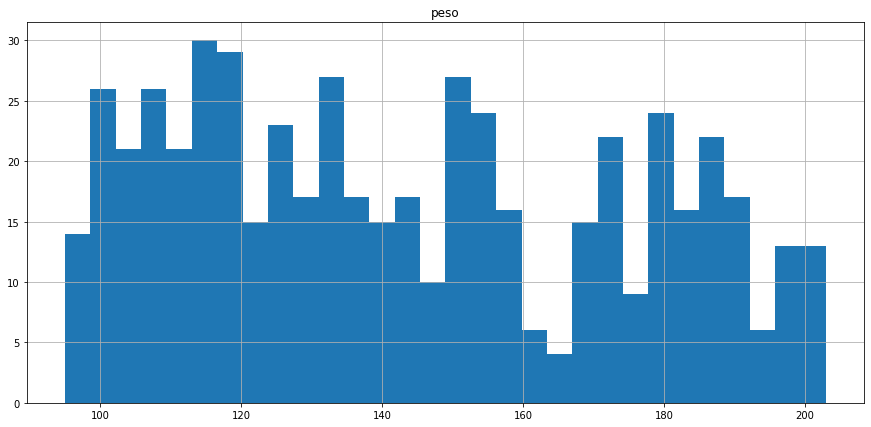

In [ ]:
import matplotlib.pyplot as plt

df_base1.hist(column = 'peso', figsize=(15,7), bins = 30)
plt.show()

## 2.3 Encode das variáveis categóricas:

As váriáveis categóricas são: genero (Base 1)

Obs.: A sigla do estado não precisa ser categorizada pois só servirá para facilidade de visualização do usuário, sendo um dado redundante.

Obs.2: as colunas 'estado' e 'pais' não precisam ser categorizadas pois o a Base2 já serve exatamente pra categorizar os estados.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_base1['genero_num'] = le.fit_transform(df_base1['genero'])
df_base1.head()

,id_cliente,peso,colesterol,genero,id_estado,genero_num
0,1,102.00,111,Masculino,23,1
1,2,115.00,135,Masculino,7,1
2,3,115.00,136,Masculino,4,1
3,4,140.00,167,Feminino,24,0
4,5,130.00,158,Masculino,26,1


## 2.4 Mesclando as bases (merge ou join)

In [ ]:
df_base = pd.merge(df_base1, df_base2, on='id_estado')
df_base = pd.merge(df_base, df_base3, on='id_cliente').sort_values('id_cliente')

df_base.reset_index(drop=True,inplace=True)
df_base.head()

,id_cliente,peso,colesterol,genero,id_estado,genero_num,estado,sigla_estado,pais,idade
0,1,102.00,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.00,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.00,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.00,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.00,227,Masculino,8,1,Espírito Santo,es,Brasil,17


In [ ]:
df_base.info()
df_base.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_cliente    498 non-null    int64  
 1   peso          498 non-null    float64
 2   colesterol    498 non-null    int64  
 3   genero        498 non-null    object 
 4   id_estado     498 non-null    int64  
 5   genero_num    498 non-null    int64  
 6   estado        498 non-null    object 
 7   sigla_estado  498 non-null    object 
 8   pais          498 non-null    object 
 9   idade         498 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 39.0+ KB


,id_cliente,peso,colesterol,id_estado,genero_num,idade
count,498.00,498.00,498.00,498.00,498.00,498.00
mean,274.01,143.67,170.48,13.18,0.52,42.88
std,158.92,31.01,39.37,7.57,0.50,15.07
min,1.00,95.00,102.00,1.00,0.00,16.00
25%,135.25,116.00,136.00,7.00,0.00,30.25
50%,276.50,140.00,169.00,13.00,1.00,42.00
75%,411.75,171.75,208.00,20.00,1.00,55.75
max,547.00,203.00,235.00,27.00,1.00,70.00


## 2.5 Organizando a base para melhor visualização

Esta etapa é apenas para fins didáticos de visualização

In [ ]:
df_base.rename(columns={'id_cliente' : 'cliente', 'genero_num' : 'cod_genero'}, inplace=True) #Renomeando algumas colunas
df_base['sigla_estado'] = df_base.sigla_estado.str.upper() #Deixando as siglas em letra maiúscula
df_baseFinal = df_base[['cliente','genero','idade','peso','colesterol','id_estado','estado','sigla_estado',]] #Escolhendo as colunas
df_baseFinal.head()

,cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado
0,1,Masculino,17,102.00,111,23,Roraima,RR
1,2,Masculino,28,115.00,135,7,Distrito Federal,DF
2,3,Masculino,62,115.00,136,4,Amazonas,AM
3,5,Masculino,44,130.00,158,26,Sergipe,SE
4,6,Masculino,17,198.00,227,8,Espírito Santo,ES


# 3. Processamento dos Dados

## 3.1 Determinando o número de clusters

In [ ]:
from sklearn.cluster import KMeans

def calcular_wcss(dados_cliente):
  wcss = []
  for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state=0)
    kmeans.fit(X=dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
dados_cliente = df_baseFinal[['peso','colesterol']]
wcss = calcular_wcss(dados_cliente)

#for i in range(len(wcss)):
#  print(f'com %2d clusters, o wcss é %.2f' %(i+1, wcss[i]))

for i in range(len(wcss)):
  print(f'O cluster {i} possui o valor de wcss de: {wcss[i]}')


O cluster 0 possui o valor de wcss de: 1248240.6686746986
O cluster 1 possui o valor de wcss de: 298932.7377352369
O cluster 2 possui o valor de wcss de: 127842.60787249672
O cluster 3 possui o valor de wcss de: 73809.93553059456
O cluster 4 possui o valor de wcss de: 49068.8738718445
O cluster 5 possui o valor de wcss de: 34064.50002100837
O cluster 6 possui o valor de wcss de: 25079.92393550797
O cluster 7 possui o valor de wcss de: 20378.05126656164
O cluster 8 possui o valor de wcss de: 16003.657266380145
O cluster 9 possui o valor de wcss de: 13385.38391038145


In [ ]:
import plotly.express as px 
import plotly.offline as py
import plotly.graph_objects as go 

In [ ]:
graph_wcss= px.line(x=range(1,11),y=wcss)
fig = go.Figure(graph_wcss)
fig.update_layout(title ='Gráfico de Cotovelo para Valores de WCSS',
                  xaxis_title='Nr. de Clusters',
                  yaxis_title='WCSS',
                  template='plotly_white')
fig.show()

A variação do WCSS é pequena após 4 clusters, portanto, escolheu-se 4.

## 3.2 Aplicando o KMeans

In [ ]:
#dados_cliente = df_baseFinal[['peso','colesterol','idade']]
clusters_base = KMeans(n_clusters=4, random_state=0)
df_baseFinal['cluster'] = clusters_base.fit_predict(dados_cliente)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_baseFinal.head()

,cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,cluster
0,1,Masculino,17,102.00,111,23,Roraima,RR,2
1,2,Masculino,28,115.00,135,7,Distrito Federal,DF,2
2,3,Masculino,62,115.00,136,4,Amazonas,AM,2
3,5,Masculino,44,130.00,158,26,Sergipe,SE,1
4,6,Masculino,17,198.00,227,8,Espírito Santo,ES,0


## 3.3 Visualização 2D dos Clusters

In [ ]:
centroide = clusters_base.cluster_centers_
#Primeira coluna: Peso
#Segunda coluna: Colesterol
#Terceira coluna: Idade

graph= px.scatter(x = df_baseFinal['peso'],
                  y = df_baseFinal['colesterol'],
                  color = df_baseFinal['cluster'])

graph_centroide = px.scatter(x= centroide[:,0],
                             y= centroide[:,1],
                             size = [5,5,5,5])

graph = go.Figure(data = graph.data + graph_centroide.data)
graph.show()

In [ ]:
centroide

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

# 4. Análise dos Resultados

## 4.1 Breve pós-processamento editando o nome dos clusters no Dataset

In [ ]:
df_cluster = df_baseFinal

df_cluster.loc[df_cluster['cluster']==2, 'nome_cluster'] = 'Baixo Risco'
df_cluster.loc[df_cluster['cluster']==1, 'nome_cluster'] = 'Risco Moderado Baixo'
df_cluster.loc[df_cluster['cluster']==3, 'nome_cluster'] = 'Risco Moderado Alto'
df_cluster.loc[df_cluster['cluster']==0, 'nome_cluster'] = 'Alto Risco'

df_cluster.head()

,cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,cluster,nome_cluster
0,1,Masculino,17,102.00,111,23,Roraima,RR,2,Baixo Risco
1,2,Masculino,28,115.00,135,7,Distrito Federal,DF,2,Baixo Risco
2,3,Masculino,62,115.00,136,4,Amazonas,AM,2,Baixo Risco
3,5,Masculino,44,130.00,158,26,Sergipe,SE,1,Risco Moderado Baixo
4,6,Masculino,17,198.00,227,8,Espírito Santo,ES,0,Alto Risco


## 4.2 Começando as Querys

In [ ]:
df_cluster.info()
df_cluster.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cliente       498 non-null    int64  
 1   genero        498 non-null    object 
 2   idade         498 non-null    int64  
 3   peso          498 non-null    float64
 4   colesterol    498 non-null    int64  
 5   id_estado     498 non-null    int64  
 6   estado        498 non-null    object 
 7   sigla_estado  498 non-null    object 
 8   cluster       498 non-null    int32  
 9   nome_cluster  498 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 37.1+ KB


,cliente,idade,peso,colesterol,id_estado,cluster
count,498.00,498.00,498.00,498.00,498.00,498.00
mean,274.01,42.88,143.67,170.48,13.18,1.40
std,158.92,15.07,31.01,39.37,7.57,1.11
min,1.00,16.00,95.00,102.00,1.00,0.00
25%,135.25,30.25,116.00,136.00,7.00,0.00
50%,276.50,42.00,140.00,169.00,13.00,1.00
75%,411.75,55.75,171.75,208.00,20.00,2.00
max,547.00,70.00,203.00,235.00,27.00,3.00


In [ ]:
df_cluster.groupby('nome_cluster').count()

,cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,cluster
nome_cluster,,,,,,,,,
Alto Risco,142,142,142,142,142,142,142,142,142
Baixo Risco,129,129,129,129,129,129,129,129,129
Risco Moderado Alto,106,106,106,106,106,106,106,106,106
Risco Moderado Baixo,121,121,121,121,121,121,121,121,121


In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x) #Definindo o formato do output do pandas
df_cluster.groupby('nome_cluster')['idade'].describe()
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Definindo o formato do output do pandas

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0000,43.2042,15.2090,16.0000,32.0000,42.5000,56.0000,69.0000
Baixo Risco,129.0000,43.1395,15.4281,17.0000,30.0000,41.0000,58.0000,70.0000
Risco Moderado Alto,106.0000,42.7170,15.3553,16.0000,29.2500,44.0000,54.7500,70.0000
Risco Moderado Baixo,121.0000,42.3471,14.4116,17.0000,30.0000,41.0000,54.0000,70.0000


In [ ]:
df_cluster.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,142,25,Rio Grande do Sul,10
Baixo Risco,129,25,Amazonas,10
Risco Moderado Alto,106,25,Pernambuco,7
Risco Moderado Baixo,121,25,Sergipe,9


In [ ]:
df_cluster.query('nome_cluster == "Alto Risco" & estado == "Mato Grosso"')

,cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,cluster,nome_cluster
103,112,Masculino,66,179.00,214,11,Mato Grosso,MT,0,Alto Risco
142,155,Masculino,16,167.00,204,11,Mato Grosso,MT,0,Alto Risco
146,160,Masculino,23,171.00,212,11,Mato Grosso,MT,0,Alto Risco
151,168,Masculino,34,184.00,222,11,Mato Grosso,MT,0,Alto Risco
178,198,Masculino,28,173.00,211,11,Mato Grosso,MT,0,Alto Risco
204,227,Masculino,35,184.00,220,11,Mato Grosso,MT,0,Alto Risco
223,248,Masculino,28,171.00,204,11,Mato Grosso,MT,0,Alto Risco
329,361,Feminino,34,180.00,218,11,Mato Grosso,MT,0,Alto Risco
470,518,Feminino,19,172.00,210,11,Mato Grosso,MT,0,Alto Risco


In [ ]:
df_cluster.groupby(['nome_cluster', 'genero'])['peso'].describe()

count   mean   std    min    25%    50%  \
nome_cluster         genero                                               
Alto Risco           Feminino   60.00 185.98  8.03 168.00 180.00 186.00   
                     Masculino  82.00 183.11 10.74 167.00 173.25 182.00   
Baixo Risco          Feminino   58.00 108.40  6.47  96.00 104.00 110.00   
                     Masculino  71.00 105.69  5.95  95.00 101.50 105.00   
Risco Moderado Alto  Feminino   59.00 152.14  7.30 140.00 145.00 154.00   
                     Masculino  47.00 152.55  6.73 140.00 148.00 151.00   
Risco Moderado Baixo Feminino   63.00 129.32  7.08 116.00 125.00 129.00   
                     Masculino  58.00 125.67  6.38 115.00 120.25 125.50   

                                  75%    max  
nome_cluster         genero                   
Alto Risco           Feminino  192.00 203.00  
                     Masculino 189.75 203.00  
Baixo Risco          Feminino  113.00 118.00  
                     Masculino 110.00 118.00  
Risco Moderado Alto  Feminino  157.00 169.00  
                     Masculino 154.50 168.00  
Risco Moderado Baixo Feminino  135.00 142.00  
                     Masculino 131.00 140.00

In [ ]:
df_cluster.groupby(['nome_cluster'])['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.00,184.32,9.76,167.00,176.25,184.00,191.00,203.00
Baixo Risco,129.00,106.91,6.31,95.00,102.00,107.00,112.00,118.00
Risco Moderado Alto,106.00,152.32,7.02,140.00,147.25,152.00,157.00,169.00
Risco Moderado Baixo,121.00,127.57,6.97,115.00,122.00,128.00,133.00,142.00


In [ ]:
df_cluster.groupby(['nome_cluster', 'genero'])['colesterol'].describe()

count   mean   std    min    25%    50%  \
nome_cluster         genero                                               
Alto Risco           Feminino   60.00 220.65  6.46 204.00 216.75 221.00   
                     Masculino  82.00 217.77  8.94 204.00 211.00 219.00   
Baixo Risco          Feminino   58.00 122.45 10.37 102.00 113.00 124.50   
                     Masculino  71.00 117.23  9.68 102.00 109.00 115.00   
Risco Moderado Alto  Feminino   59.00 186.15 10.18 168.00 176.00 189.00   
                     Masculino  47.00 185.89  9.31 172.00 178.00 184.00   
Risco Moderado Baixo Feminino   63.00 156.57  9.60 138.00 149.00 156.00   
                     Masculino  58.00 151.64  9.39 138.00 143.25 151.50   

                                  75%    max  
nome_cluster         genero                   
Alto Risco           Feminino  225.00 235.00  
                     Masculino 225.00 235.00  
Baixo Risco          Feminino  130.00 138.00  
                     Masculino 126.00 136.00  
Risco Moderado Alto  Feminino  194.50 201.00  
                     Masculino 192.50 203.00  
Risco Moderado Baixo Feminino  166.00 171.00  
                     Masculino 158.00 168.00

# 5. Exportando os Dados

In [ ]:
df_cluster.to_csv('classificacao_clientes.csv', sep = ';', encoding ='latin1')